In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import annotations

# Add parent directory to path.
from pathlib import Path
import os
import sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/a/64438413
fdir = Path(os.path.abspath('')).resolve() # Directory of current file.
path = fdir/'..'
if path not in sys.path:
    sys.path.append(str(path))

# Complete imports.
import numpy as np
import makassar_ml as ml
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Use seaborn themes.

In [2]:
path = Path("~/research/makassar/datasets/beijing_pm25").expanduser()
df = ml.datasets.beijingpm25.load_beijingpm25_df(path=path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           43824 non-null  int64         
 1   year         43824 non-null  int64         
 2   month        43824 non-null  int64         
 3   day          43824 non-null  int64         
 4   hour         43824 non-null  int64         
 5   pm2.5        41757 non-null  float64       
 6   DEWP         43824 non-null  int64         
 7   TEMP         43824 non-null  float64       
 8   PRES         43824 non-null  float64       
 9   cbwd         43824 non-null  object        
 10  Iws          43824 non-null  float64       
 11  Is           43824 non-null  int64         
 12  Ir           43824 non-null  int64         
 13  datetime     43824 non-null  datetime64[ns]
 14  day_of_year  43824 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)

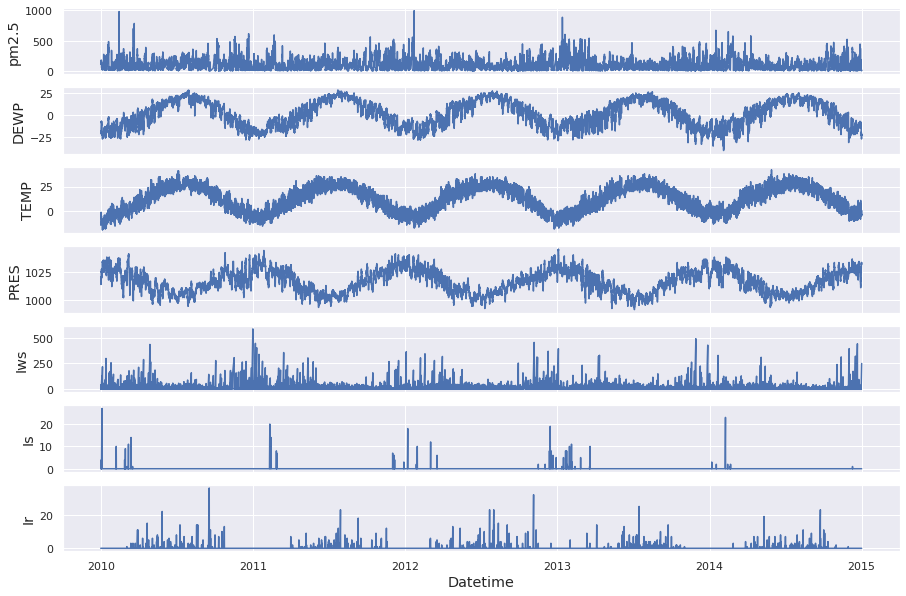

In [3]:
# Visualize the entire raw data.
keys = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
n = len(keys)
fig = plt.figure(figsize=(15,10))
axes = fig.subplots(n, sharex=True)
for key, ax in zip(keys, axes):
    sns.lineplot(x='datetime', y=key, data=df, ax=ax)
    ax.set_xlabel('Datetime', fontsize='large')
    ax.set_ylabel(key, fontsize='large')
fig.show()

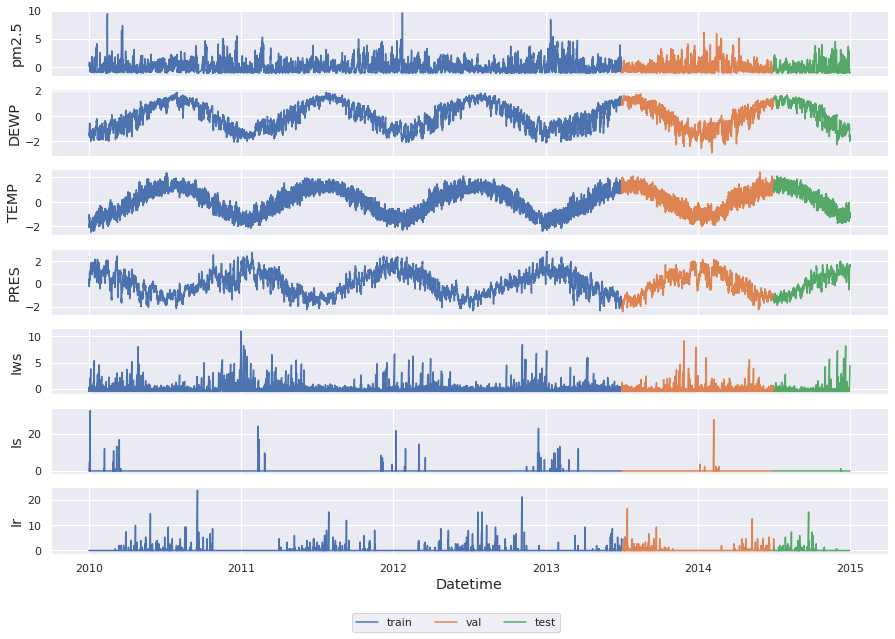

In [8]:
# Load the dataset again using train/val/test split.
train_df, val_df, test_df = ml.datasets.beijingpm25.load_beijingpm25_df(
    split=(0.7,0.2,0.1),
    path=path,
)

# Normalize specific keys.
train_mean = train_df[keys].mean()
train_std = train_df[keys].std()
train_df[keys] = (train_df[keys] - train_mean)/train_std
val_df[keys] = (val_df[keys] - train_mean)/train_std
test_df[keys] = (test_df[keys] - train_mean)/train_std

# Plot data keys.
fig, axs = plt.subplots(nrows=len(keys), figsize=(15,10), sharex=True)
for i,key in enumerate(keys):
    sns.lineplot(data=train_df, x='datetime', y=key, label='train', ax=axs[i])
    sns.lineplot(data=val_df, x='datetime', y=key, label='val', ax=axs[i])
    sns.lineplot(data=test_df, x='datetime', y=key, label='test', ax=axs[i])
    # axs[i].legend(bbox_to_anchor=(1.0,0.5), loc='center left')
    axs[i].legend().set_visible(False)
    axs[i].set_xlabel('Datetime', fontsize='large')
    axs[i].set_ylabel(key, fontsize='large')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5,0.05))

In [15]:
df['datetime'].iloc[[0,-1]]

0       2010-01-01 00:00:00
43823   2014-12-31 23:00:00
Name: datetime, dtype: datetime64[ns]

In [37]:
latex = df[['datetime']+keys].describe(datetime_is_numeric=True).T[['count','mean','std','min','max']].to_latex()
print(latex)

\begin{tabular}{llllll}
\toprule
{} &    count &                 mean &        std &                  min &                  max \\
\midrule
datetime &    43824 &  2012-07-01 23:30:00 &        NaN &  2010-01-01 00:00:00 &  2014-12-31 23:00:00 \\
pm2.5    &  41757.0 &            98.613215 &  92.050387 &                  0.0 &                994.0 \\
DEWP     &  43824.0 &             1.817246 &   14.43344 &                -40.0 &                 28.0 \\
TEMP     &  43824.0 &            12.448521 &  12.198613 &                -19.0 &                 42.0 \\
PRES     &  43824.0 &          1016.447654 &  10.268698 &                991.0 &               1046.0 \\
Iws      &  43824.0 &             23.88914 &  50.010635 &                 0.45 &                585.6 \\
Is       &  43824.0 &             0.052734 &   0.760375 &                  0.0 &                 27.0 \\
Ir       &  43824.0 &             0.194916 &   1.415867 &                  0.0 &                 36.0 \\
\bottomrule
\end{ta

/tmp/ipykernel_13312/1964759371.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df[['datetime']+keys].describe(datetime_is_numeric=True).T[['count','mean','std','min','max']].to_latex()
